In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unemp = pd.read_csv(r"C:\\Users\\Jayprakash\\Downloads\Cipherbyte\\Unemployment in India.csv")
unemp_rate = pd.read_csv(r"C:\\Users\\Jayprakash\\Downloads\Cipherbyte\\Unemployment_Rate_upto_11_2020.csv")

In [2]:
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
unemp_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


- Uemployment india can be used to determine trends according to rural and urban area Overall or state wise from May 2019 to June 2020.
- Uemployment india upto 11-2020 can be used to determine trends according to state wise or overall from jan 2020 to Oct 2020.

In [4]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


### Cleaning Data and Checking for Inconsistencies

In [5]:
unemp.isna().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

As all the columns have equal number of null values, they might be present on rach record or all the records which will affect the insights. So, removing them will solve our data inconsisteny.

In [6]:
unemp = unemp.dropna(how='all')
unemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [7]:
unemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


- Note that in seconda dataset, there are two regions, 1st is the state of the country and 2dn is the geographical part of the country.
- Also, the datatype of date is object in both the datasets.
- Region.1 name should be changed to other name.

In [8]:
unemp['Date'] = pd.to_datetime(unemp['Date'], dayfirst = True)
unemp_rate['Date'] = pd.to_datetime(unemp_rate['Date'], dayfirst = True)

In [9]:
unemp_rate = unemp_rate.rename(columns={'Region.1': 'SubRegion'})

### Statistical analysis

In [10]:
unemp.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [11]:
unemp_rate.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [12]:
print("Duplicate records in the 1st dataset: ",unemp.duplicated().sum())
print("Duplicate records in the 2nd dataset: ",unemp_rate.duplicated().sum())

Duplicate records in the 1st dataset:  0
Duplicate records in the 2nd dataset:  0


In [13]:
unemp['Frequency'].unique()

array(['Monthly'], dtype=object)

In [14]:
unemp_rate['Frequency'].unique()

array(['M'], dtype=object)

In [15]:
unemp = unemp.drop(['Frequency'], axis = 1)
unemp_rate = unemp_rate.drop(['Frequency'], axis = 1)

As all the frequency of both the given dataset is monthly(M) there is no need of it. So, removing the values and instead, we can derive year, month and date.

In [16]:
unemp['Year'] = unemp['Date'].dt.year
unemp['Month'] = unemp['Date'].dt.month
unemp

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,2020,2
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,2020,3
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,2020,4
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,2020,5


In [17]:
unemp['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [18]:
unemp['Year'].value_counts()

Year
2019    430
2020    310
Name: count, dtype: int64

### Visualisation of Datasets

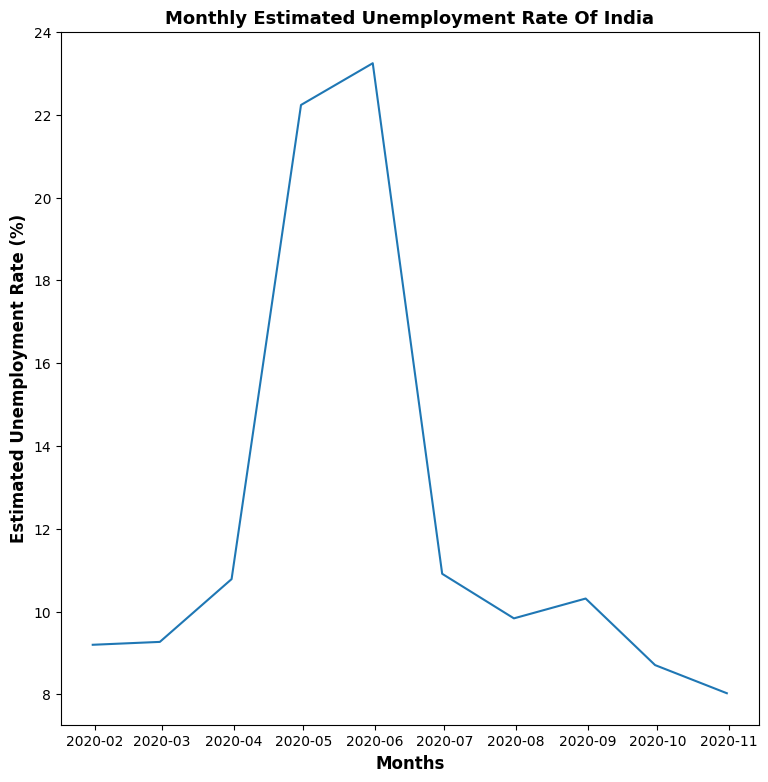

In [19]:
plt.figure(figsize=(9,9))
plt.plot(unemp_rate.Date.unique(),unemp_rate.groupby(by = 'Date')['Estimated Unemployment Rate (%)'].mean())
plt.xlabel("Months",fontsize = 12, fontweight = 'bold')
plt.ylabel("Estimated Unemployment Rate (%)",fontsize = 12, fontweight = 'bold')
plt.title("Monthly Estimated Unemployment Rate Of India",fontsize = 13, fontweight = 'bold')
plt.show()

<Axes: xlabel='Area', ylabel='count'>

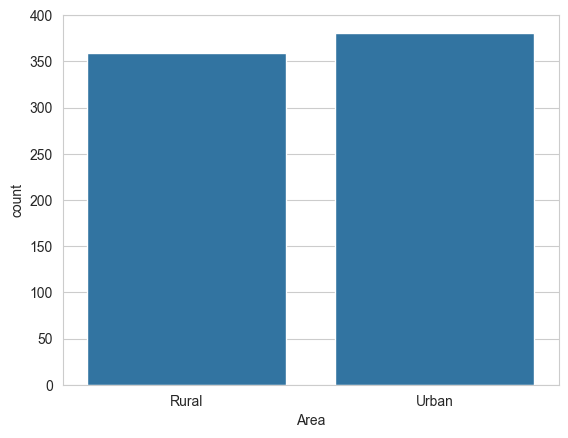

In [20]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x='Area',data=unemp)

<Axes: xlabel='Year', ylabel='count'>

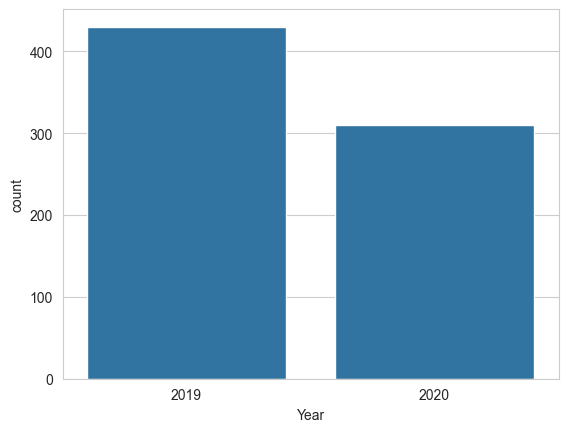

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Year',data=unemp)

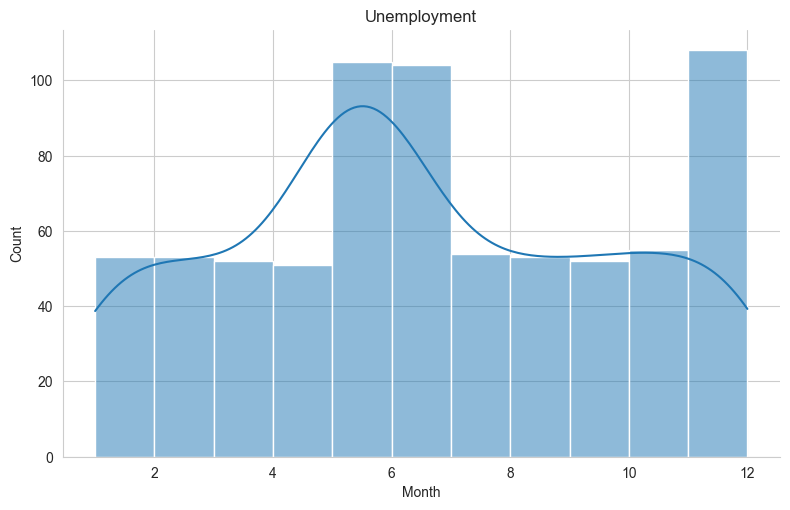

In [22]:
sns.displot(unemp, x = 'Month', kde = True, aspect = 8/5).set(title = 'Unemployment')
plt.show()

In [23]:
unemp.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month'],
      dtype='object')

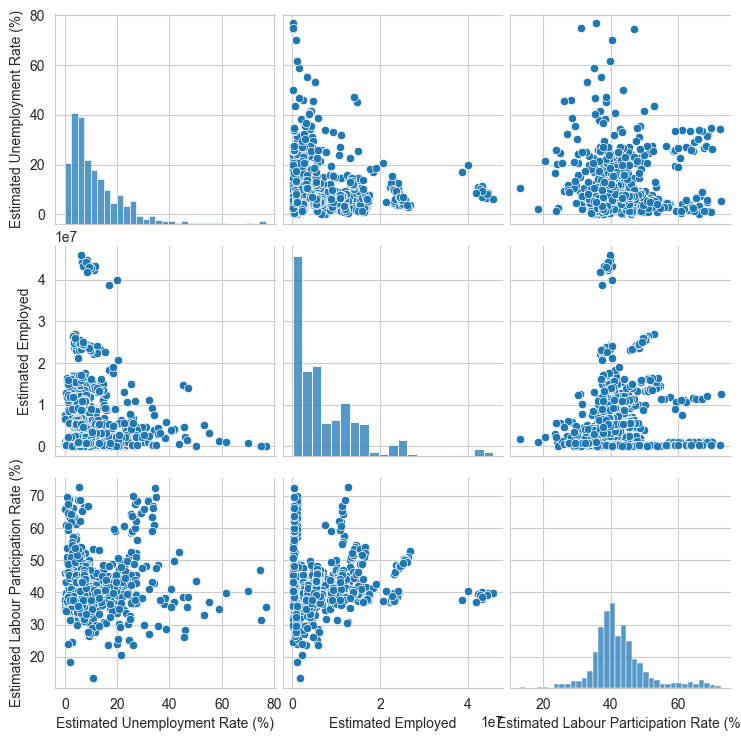

In [24]:
sns.pairplot(unemp[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']])
plt.show()

<Axes: >

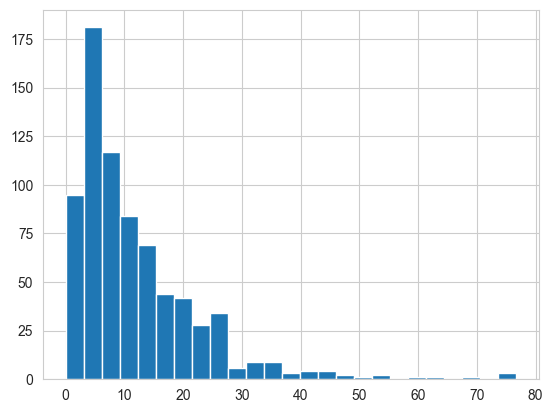

In [25]:
unemp['Estimated Unemployment Rate (%)'].hist(bins = 25)

<Axes: >

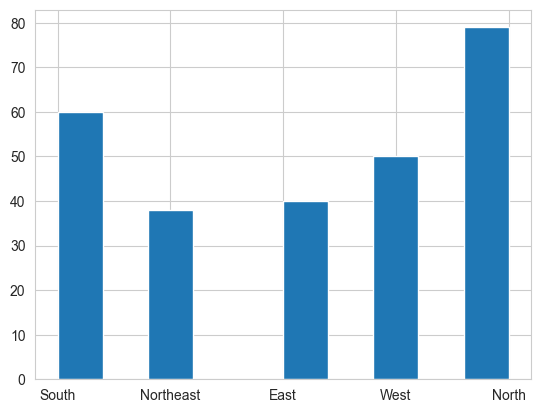

In [26]:
#unemp_rate.columns
unemp_rate['SubRegion'].hist()

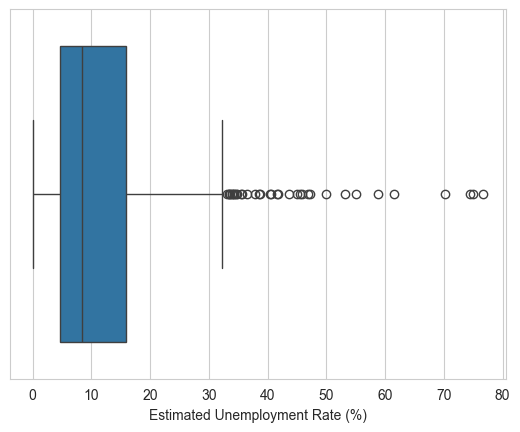

In [27]:
sns.boxplot(x='Estimated Unemployment Rate (%)', data=unemp)
plt.show()

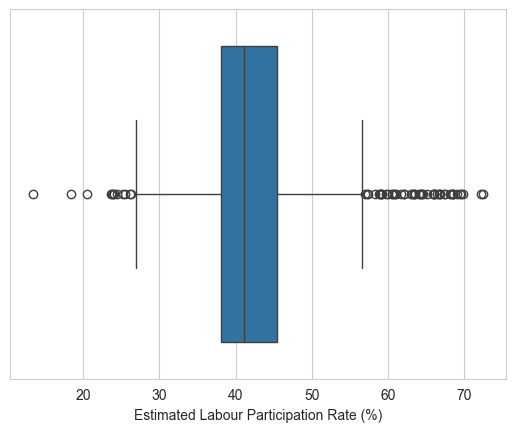

In [28]:
sns.boxplot(x = 'Estimated Labour Participation Rate (%)',data = unemp)
plt.show()

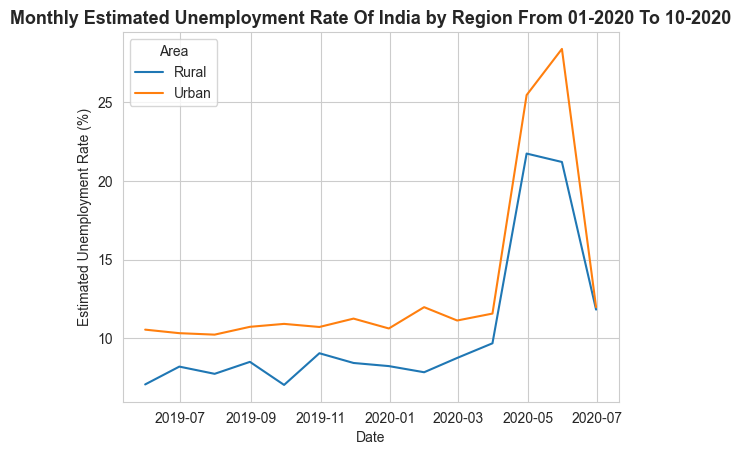

In [29]:
data = (unemp.groupby(by = ['Date','Area'])['Estimated Unemployment Rate (%)'].mean()).head(28).reset_index()

sns.lineplot(x='Date',y='Estimated Unemployment Rate (%)',hue = 'Area',data = data)
plt.title("Monthly Estimated Unemployment Rate Of India by Region From 01-2020 To 10-2020",fontsize = 13, fontweight = 'bold')
plt.show()

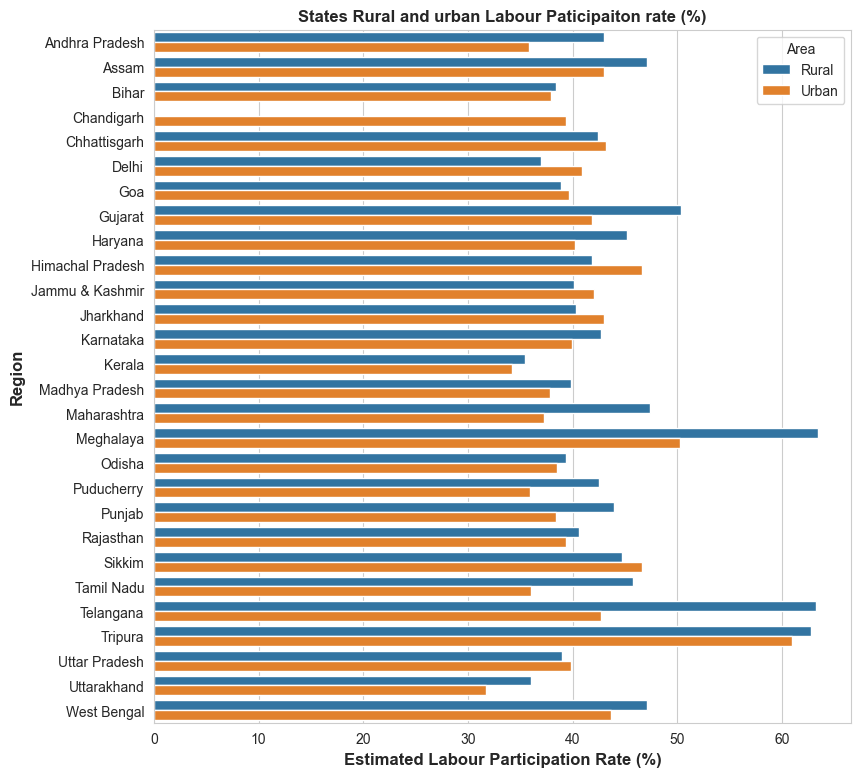

In [30]:
data = unemp.groupby(by = ['Region','Area'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

plt.figure(figsize = (9, 9))
sns.barplot(y = 'Region', x = 'Estimated Labour Participation Rate (%)', hue = 'Area', data = data, orient = 'h')
plt.title("States Rural and urban Labour Paticipaiton rate (%)",fontweight = 'bold')
plt.xlabel("Estimated Labour Participation Rate (%)",fontsize = 12,fontweight = 'bold')
plt.ylabel("Region",fontsize = 12,fontweight = 'bold')
plt.show()

- There is a higher unemployment rate in urban areas compared to rural areas, and the reason is the population difference. Coronavirus has more victims in urban areas due to the dense population.
- Haryana and Tripura have the highest average unemployment rate among all states.
- Meghalaya, Trupura and Telangana have the highest average Labiur Participation Rate.**

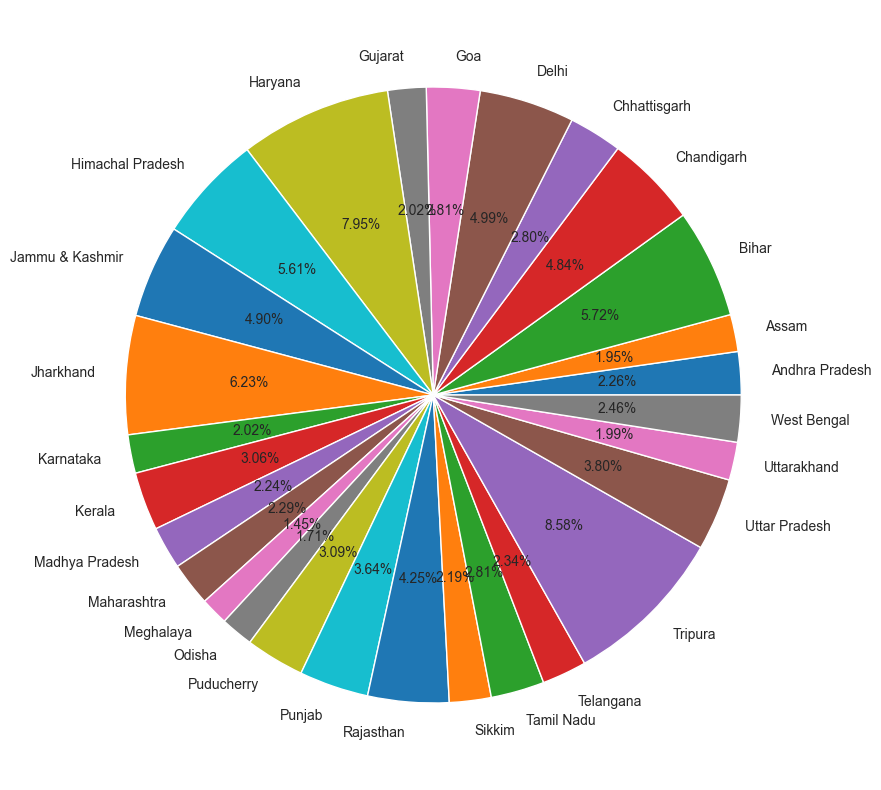

In [31]:
unemp_state = unemp.groupby(by = ['Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize = (13,10))
plt.pie(x = 'Estimated Unemployment Rate (%)', autopct = '%1.2f%%',labels = 'Region', data = unemp_state)
plt.show()